In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("movie_review_train.csv")
test = pd.read_csv("movie_review_test.csv")

In [3]:
train.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [4]:
test.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [5]:
train.shape

(1600, 2)

In [6]:
test.shape

(400, 2)

In [14]:
X_train = train.text
y_train = train['class'].map({"Pos":1,"Neg":0})

In [16]:
X_test = test.text
y_test = test['class'].map({"Pos":1,"Neg":0})

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english', min_df=.03, max_df=.8) ## remove extremely rare ones and extremely common ones
vect.fit(X_train)
print(len(vect.vocabulary_.keys()))


1643


In [20]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [22]:
X_test_transformed

<400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>

In [23]:
X_train_transformed

<1600x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 217396 stored elements in Compressed Sparse Row format>

## Train the model

In [24]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train_transformed,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### Predict on train set

In [25]:
y_train_pred = bnb.predict(X_train_transformed)
y_train_probs = bnb.predict_proba(X_train_transformed)

y_train_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Predict on test set

In [26]:
y_test_pred = bnb.predict(X_test_transformed)
y_test_probs = bnb.predict_proba(X_test_transformed)

y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

### Metrics

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_test_pred)

acc

0.79

In [28]:
from sklearn.metrics import confusion_matrix,auc,roc_curve,precision_score,recall_score,f1_score

confusion = confusion_matrix(y_test,y_test_pred)

In [29]:
confusion

array([[177,  23],
       [ 61, 139]], dtype=int64)

In [30]:
TN = confusion[0,0]
TP = confusion[1,1]
FN = confusion[1,0]
FP = confusion[0,1]

In [31]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print("sensitivity:", sensitivity)
print("specificity: ",specificity)

sensitivity: 0.695
specificity:  0.885


## ROC

In [33]:
FPR,TPR,thresholds = roc_curve(y_test,y_test_probs[:,1])  ##giving positive class probabilities only
roc_auc = auc(FPR,TPR)
roc_auc

0.87275

In [34]:
pd.DataFrame({'Threshold': thresholds,'TPR':TPR,'FPR':FPR})

,Threshold,TPR,FPR
0,1.000000e+00,0.015,0.000
1,9.999991e-01,0.185,0.000
2,9.999990e-01,0.185,0.005
3,9.999926e-01,0.225,0.005
4,9.999879e-01,0.225,0.010
5,9.999782e-01,0.250,0.010
6,9.999686e-01,0.250,0.015
7,9.998651e-01,0.330,0.015
8,9.998489e-01,0.330,0.025
9,9.984956e-01,0.430,0.025


Text(0.5,1,'ROC')

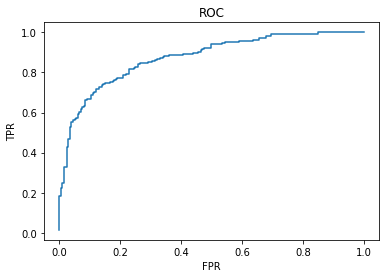

In [35]:
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")